In [1]:
'''
【课程3.4.2】  PCA主成分分析的python实现方法

最广泛无监督算法 + 基础的降维算法
通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维

二维数据降维 / 多维数据降维 

'''

'\n【课程3.4.2】  PCA主成分分析的python实现方法\n\n最广泛无监督算法 + 基础的降维算法\n通过线性变换将原始数据变换为一组各维度线性无关的表示，用于提取数据的主要特征分量 → 高维数据的降维\n\n二维数据降维 / 多维数据降维 \n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

         X1        X2
0 -1.174787 -1.404131
1 -1.374449 -1.294660
2 -2.316007 -2.166109
3  0.947847  1.460480
4  1.762375  1.640622
(200, 2)


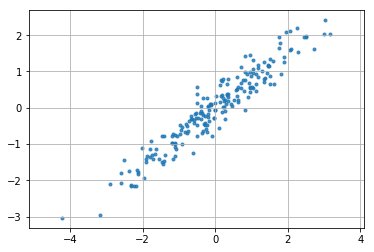

In [5]:
# 二维数据降维
# 数据创建
rng = np.random.RandomState(8)
data = np.dot(rng.rand(2,2),rng.randn(2,200)).T
df = pd.DataFrame({'X1':data[:,0],
                    'X2':data[:,1]})
print(df.head())
print(df.shape)

plt.scatter(df['X1'],df['X2'], alpha = 0.8, marker = '.')
plt.axis('equal')
plt.grid()
# 生成图表

[2.79699086]
[[-0.7788006  -0.62727158]]
1
-----
original shape: (200, 2)
transformed shape: (200, 1)
[[ 1.77885258]
 [ 1.8656813 ]
 [ 3.14560277]
 [-1.67114513]
 [-2.41849842]]
-----


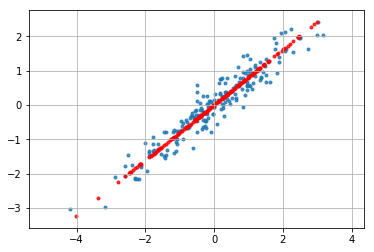

In [15]:
# 二维数据降维
# 构建模型，分析主成分

from sklearn.decomposition import PCA  
# 加载主成分分析模块PCA

pca = PCA(n_components = 1)  # n_components = 1 → 降为1维
pca.fit(df)  # 构建模型
# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)  
# n_components:  PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
# copy: True或者False，默认为True → 表示是否在运行算法时，将原始训练数据复制一份
# fit(X,y=None) → 调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练

print(pca.explained_variance_)  # 输出特征值
print(pca.components_)  # 输出特征向量
print(pca.n_components_)  # 输出成分的个数
print('-----')
#2.78*( 0.77*x1 + 0.62*x2 )
# components_：返回具有最大方差的成分。
# explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
# n_components_：返回所保留的成分个数n。

# 这里是shape(200,2)降为shape(200,1)，只有1个特征值，对应2个特征向量
# 降维后主成分 A1 = 0.7788006 * X1 + 0.62727158 * X2

x_pca = pca.transform(df)  # 数据转换
x_new = pca.inverse_transform(x_pca)  # 将降维后的数据转换成原始数据
print('original shape:',df.shape)
print('transformed shape:',x_pca.shape)
print(x_pca[:5])
print('-----')
# 主成分分析，生成新的向量x_pca
# fit_transform(X) → 用X来训练PCA模型，同时返回降维后的数据，这里x_pca就是降维后的数据
# inverse_transform() → 将降维后的数据转换成原始数据

plt.scatter(df['X1'],df['X2'], alpha = 0.8, marker = '.')
plt.scatter(x_new[:,0],x_new[:,1], alpha = 0.8, marker = '.',color = 'r')
plt.axis('equal')
plt.grid()
# 生成图表

In [17]:
# 多维数据降维 
# 加载数据

from sklearn.datasets import load_digits
digits = load_digits()
print(digits .keys())
print('数据长度为:%i条' % len(digits['data']))
print('数据形状为:%i条',digits.data.shape)
print(digits.data[:2])
# 导入数据

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
数据长度为:1797条
数据形状为:%i条 (1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]]


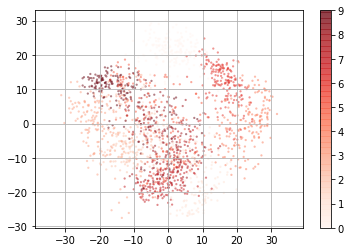

In [20]:
# 多维数据降维 
# 构建模型，分析主成分

pca = PCA(n_components = 2)  # 降为2纬
projected = pca.fit_transform(digits.data)
projected[:5]

plt.scatter(projected[:,0],projected[:,1],
           c = digits.target, edgecolor = 'none',alpha = 0.5,
           cmap = 'Reds',s = 5)
plt.axis('equal')
plt.grid()
plt.colorbar()
# 二维数据制图

original shape: (1797, 64)
transformed shape: (1797, 10)
[179.0069301  163.71774687 141.78843908 101.10037483  69.51315469
  59.1084903   51.88449294  44.01498275  40.31067864  37.01098881]
(10, 64)
            b     b_sum
0  179.006930  0.201708
1  163.717747  0.386188
2  141.788439  0.545957
3  101.100375  0.659879
4   69.513155  0.738207
5   59.108490  0.804812
6   51.884493  0.863276
7   44.014983  0.912873
8   40.310679  0.958295
9   37.010989  1.000000


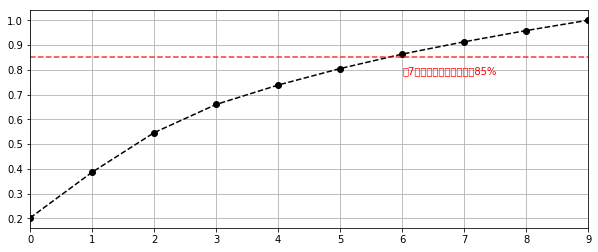

In [23]:
# 多维数据降维 
# 主成分筛选

pca = PCA(n_components = 10)  # 降为10纬
projected = pca.fit_transform(digits.data)
print('original shape:',digits.data.shape)
print('transformed shape:',projected.shape)
print(pca.explained_variance_)  # 输出特征值
print(pca.components_.shape)  # 输出特征向量形状
#print(projected)  # 输出解析后数据
# 降维后，得到10个成分，每个成分有64个特征向量

c_s = pd.DataFrame({'b':pca.explained_variance_,
                   'b_sum':pca.explained_variance_.cumsum()/pca.explained_variance_.sum()})
print(c_s)
# 做贡献率累计求和
# 可以看到第7个成分时候，贡献率超过85% → 选取前7个成分作为主成分

c_s['b_sum'].plot(style = '--ko', figsize = (10,4))
plt.axhline(0.85,color='r',linestyle="--",alpha=0.8)  
plt.text(6,c_s['b_sum'].iloc[6]-0.08,'第7个成分累计贡献率超过85%',color = 'r')
plt.grid()

In [24]:
'''
【课程3.4.3】  K-means聚类的python实现方法

最常用的机器学习聚类算法，且为典型的基于距离的聚类算法
K均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇
以欧式距离作为相似度测度

'''

'\n【课程3.4.3】  K-means聚类的python实现方法\n\n最常用的机器学习聚类算法，且为典型的基于距离的聚类算法\nK均值： 基于原型的、划分的距离技术，它试图发现用户指定个数(K)的簇\n以欧式距离作为相似度测度\n\n'

[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]]
[1 3 0 3 1]


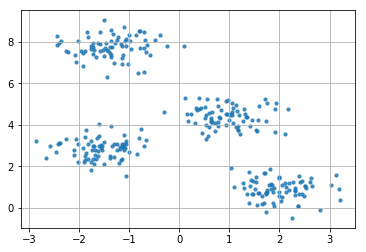

In [26]:
# 创建数据

from sklearn.datasets.samples_generator import make_blobs
# make_blobs聚类数据生成器

x,y_true = make_blobs(n_samples = 300,   # 生成300条数据
                     centers = 4,        # 四类数据
                     cluster_std = 0.5,  # 方差一致   方差越大，越分散
                     random_state = 0)
print(x[:5])
print(y_true[:5])
# n_samples → 待生成的样本的总数。
# n_features → 每个样本的特征数。
# centers → 类别数
# cluster_std → 每个类别的方差，如多类数据不同方差，可设置为[1.0,3.0]（这里针对2类数据）
# random_state → 随机数种子
# x → 生成数据值， y → 生成数据对应的类别标签
plt.scatter(x[:,0],x[:,1],s = 10,alpha = 0.8)
plt.grid()
# 绘制图表

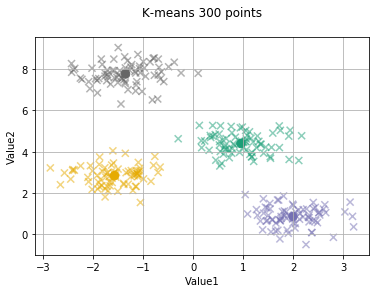

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
centroids = kmeans.cluster_centers_
# 构建模型，并预测出样本的类别y_kmeans
# kmeans.cluster_centers_：得到不同簇的中心点

plt.scatter(x[:,0],x[:,1],c = y_kmeans, cmap = 'Dark2', s= 50,alpha = 0.5,marker='x')
plt.scatter(centroids[:,0],centroids[:,1],c = [0,1,2,3], cmap = 'Dark2',s= 70,marker='o')
plt.title('K-means 300 points\n')
plt.xlabel('Value1')
plt.ylabel('Value2')
plt.grid()
# 绘制图表